In [1]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# read data
df = pd.read_csv('/Users/mrfaith/Python3/data09_diabetes.csv')
df_data = df.iloc[:,:-1]
df_target = df['Y']

# df

In [12]:
# 데이터 자르기 test 사이즈를 1/3 정도로
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(
        df_data,df_target,test_size=0.33,random_state=0)

In [14]:
# linear regression
from sklearn.linear_model import LinearRegression
f = LinearRegression()
f.fit(xtrain,ytrain)
f.intercept_,f.coef_
f.score(xtrain,ytrain)
f.score(xtest,ytest)

0.4033025232246108

In [21]:
# ridge regression
from sklearn.linear_model import Ridge
f = Ridge(alpha=0.5) # 알파 = 람다값
f.fit(xtrain,ytrain)
f.intercept_,f.coef_
f.score(xtrain,ytrain)
# f.score(xtest,ytest)

0.50683020985745

In [24]:
# lasso regression
from sklearn.linear_model import Lasso
f = Lasso(alpha=1.0)
f.fit(xtrain,ytrain)
f.intercept_,f.coef_
# f.score(xtrain,ytrain)
f.score(xtest,ytest)

0.3161041896145761

In [25]:
# Elastic Net regression
from sklearn.linear_model import ElasticNet
f = ElasticNet(alpha=0.1,l1_ratio=0.5)
f.fit(xtrain,ytrain)
f.intercept_,f.coef_
f.score(xtrain,ytrain)
# f.score(xtest,ytest)

0.11657195407455456

In [18]:
# select parameter using cross-validation
from sklearn.model_selection import cross_val_score
exp = np.linspace(-2,0,21)
alphas = 10**exp
s = np.zeros((len(alphas),3))
for n in range(s.shape[0]):
    f = Lasso(alpha=alphas[n])
    f.fit(xtrain,ytrain)
    s[n,0] = f.score(xtrain,ytrain)
    s[n,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
    s[n,2] = f.score(xtest,ytest)

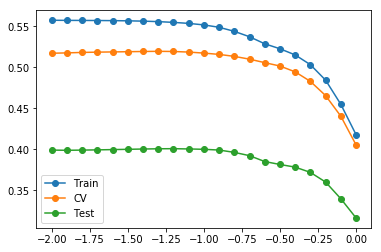

In [20]:
plt.plot(exp,s[:,0],exp,s[:,1],exp,s[:,2],marker='o')
plt.legend(('Train','CV','Test'))
plt.show()
# 가장 높은 값이 CV에서는 4번째인가 그런데, test 셋이 들어오더라도 확인이 가능하다.

In [29]:
# 최적값을 찾아서 가보자. CV를 통해서 최적값을 구할 수 있다.
idx = np.argmax(s[:,1])
idx

7

In [30]:
alphas[7]

0.05011872336272725

In [32]:
f.fit(xtrain,ytrain)
f.coef_
#regularization 한 모습이다.

array([ 10.33723636,   0.27702963,  41.05311943,  29.32127031,
        12.44711405,   9.01024468, -26.41737411,  26.71079899,
        39.56994417,  25.50546035])

In [35]:
# practice 과목 출석율 예측
df = pd.read_csv('/Users/mrfaith/Python3/data02_college.csv')
X = df.iloc[:,3:]
y = df['Accept']/df['Apps']
np.random.seed(1)
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.5,random_state=0)

#df

In [39]:
# elastic net parameter search
exp = np.linspace(-4,1,31)
alphas = 10**exp
ratios = np.linspace(0,1,11)
s = np.zeros((len(alphas)*len(ratios),5))
idx = 0
for i in range(len(alphas)):
    for j in range(len(ratios)):
        f = ElasticNet(alpha=alphas[i],l1_ratio=ratios[j],max_iter=10000)
        f.fit(xtrain,ytrain)
#         스코어 저장
        s[idx,0] = f.score(xtrain,ytrain)
        s[idx,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
        s[idx,2] = f.score(xtest,ytest)      
        s[idx,3] = alphas[i] #릿지에 대한
        s[idx,4] = ratios[j] #라쏘에 대한
        idx = idx+1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/pyth

In [40]:
idx = np.argmax(s[:,1])
idx

189